# Crop Production Prediction in India

### Objective:
#### The aim of this project is to develop a machine-learning model to predict crop production in various regions of India. This prediction will be based on factors such as the state, district, crop type, season, area under cultivation, crop year and production. Accurate predictions can assist farmers, policymakers, and stakeholders in making informed decisions regarding agriculture planning, resource allocation, and crop management.

### Key features :

##### 1.State: The state in India where the crop is cultivated.
##### 2.District: The district within the state where the crop is cultivated.
##### 3.Crop: The type of crop being cultivated (e.g., rice, wheat, maize).
##### 4.Season: The season during which the crop is cultivated (e.g., Kharif, Rabi).
##### 5.Crop Year: The year in which the crop was cultivated
##### 6.Area: The area of land (in hectares) used for cultivating the crop.
##### 7.Production: The total production of the crop (in tonnes), which is the target variable for prediction.

### Imoprt the libraries

In [1]:
# Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Algorithm used to build ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data =pd.read_csv('crop_production.csv')
data.shape

(246091, 7)

In [4]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Here we split the data into train and test

In [5]:
train = data.sample(frac=0.8,random_state=0)
test = data.drop(train.index)

In [6]:
train.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
222211,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
148500,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
40239,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0
117,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Dry chillies,254.0,402.0
64394,Gujarat,SURENDRANAGAR,1997,Kharif,Bajra,85900.0,103000.0


In [7]:
train.shape

(196873, 7)

In [8]:
test.shape

(49218, 7)

In [9]:
train = train.reset_index(drop=True)

In [10]:
train.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Dry chillies,254.0,402.0
4,Gujarat,SURENDRANAGAR,1997,Kharif,Bajra,85900.0,103000.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196873 entries, 0 to 196872
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     196873 non-null  object 
 1   District_Name  196873 non-null  object 
 2   Crop_Year      196873 non-null  int64  
 3   Season         196873 non-null  object 
 4   Crop           196873 non-null  object 
 5   Area           196873 non-null  float64
 6   Production     193911 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.5+ MB


### Data Cleaning

In [12]:
train.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       2962
dtype: int64

In [13]:
train.Production.unique()

array([5.10000e+01, 4.75815e+04, 1.20000e+02, ..., 3.90510e+04,
       1.57434e+05, 1.23800e+06])

In [14]:
train[(train.Production.isnull())]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
78,Haryana,SIRSA,1998,Whole Year,Sannhamp,7.0,NaN
146,Madhya Pradesh,DHAR,2009,Whole Year,Tobacco,1.0,NaN
153,Chhattisgarh,BIJAPUR,2006,Whole Year,Turmeric,12.0,NaN
200,Haryana,KARNAL,2010,Kharif,Maize,252.0,NaN
263,Haryana,SONIPAT,2005,Kharif,Moong(Green Gram),172.0,NaN
...,...,...,...,...,...,...,...
196522,Haryana,KURUKSHETRA,2009,Kharif,Sesamum,1.0,NaN
196627,Haryana,KARNAL,2005,Kharif,Cotton(lint),51.0,NaN
196628,Madhya Pradesh,ASHOKNAGAR,2006,Rabi,Small millets,1.0,NaN
196745,Kerala,THIRUVANANTHAPURAM,2013,Whole Year,Cowpea(Lobia),40.0,NaN


In [15]:
train.dropna(inplace=True)

In [16]:
train.Production.value_counts()

Production
1.00          3180
0.00          2817
100.00        2808
2.00          2338
3.00          1813
              ... 
53079.00         1
9797.00          1
6102.77          1
121037.00        1
1238000.00       1
Name: count, Length: 44287, dtype: int64

In [17]:
train[train.duplicated()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [18]:
train['Crop_Year'].unique()

array([2001, 2007, 2010, 1997, 2002, 2003, 2004, 1998, 1999, 2009, 2008,
       2012, 2014, 2006, 2013, 2005, 2011, 2000, 2015], dtype=int64)

### The Data has been collected from the year 1997 to 2015

In [19]:
train['State_Name'].unique()

array(['Uttar Pradesh', 'Odisha', 'Bihar', 'Andaman and Nicobar Islands',
       'Gujarat', 'Andhra Pradesh', 'Rajasthan', 'Telangana ',
       'West Bengal', 'Assam', 'Maharashtra', 'Madhya Pradesh',
       'Arunachal Pradesh', 'Karnataka', 'Punjab', 'Chhattisgarh',
       'Nagaland', 'Kerala', 'Tamil Nadu', 'Meghalaya', 'Manipur',
       'Jammu and Kashmir ', 'Uttarakhand', 'Jharkhand', 'Goa', 'Haryana',
       'Mizoram', 'Tripura', 'Dadra and Nagar Haveli', 'Sikkim',
       'Himachal Pradesh', 'Puducherry', 'Chandigarh'], dtype=object)

In [20]:
len(train['State_Name'].unique())

33

### There are a total of 33 states in this data

In [21]:
train.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Dry chillies,254.0,402.0
4,Gujarat,SURENDRANAGAR,1997,Kharif,Bajra,85900.0,103000.0


### EDA (Exporatry Data Analysis)

In [22]:
 state_wise =train.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)
state_wise

,State_Name,Production
15,Kerala,7.592551e+10
1,Andhra Pradesh,1.400627e+10
27,Tamil Nadu,9.383089e+09
30,Uttar Pradesh,2.510232e+09
3,Assam,1.659829e+09
32,West Bengal,1.077135e+09
17,Maharashtra,1.019219e+09
0,Andaman and Nicobar Islands,6.916703e+08
14,Karnataka,6.772324e+08
24,Punjab,4.700334e+08


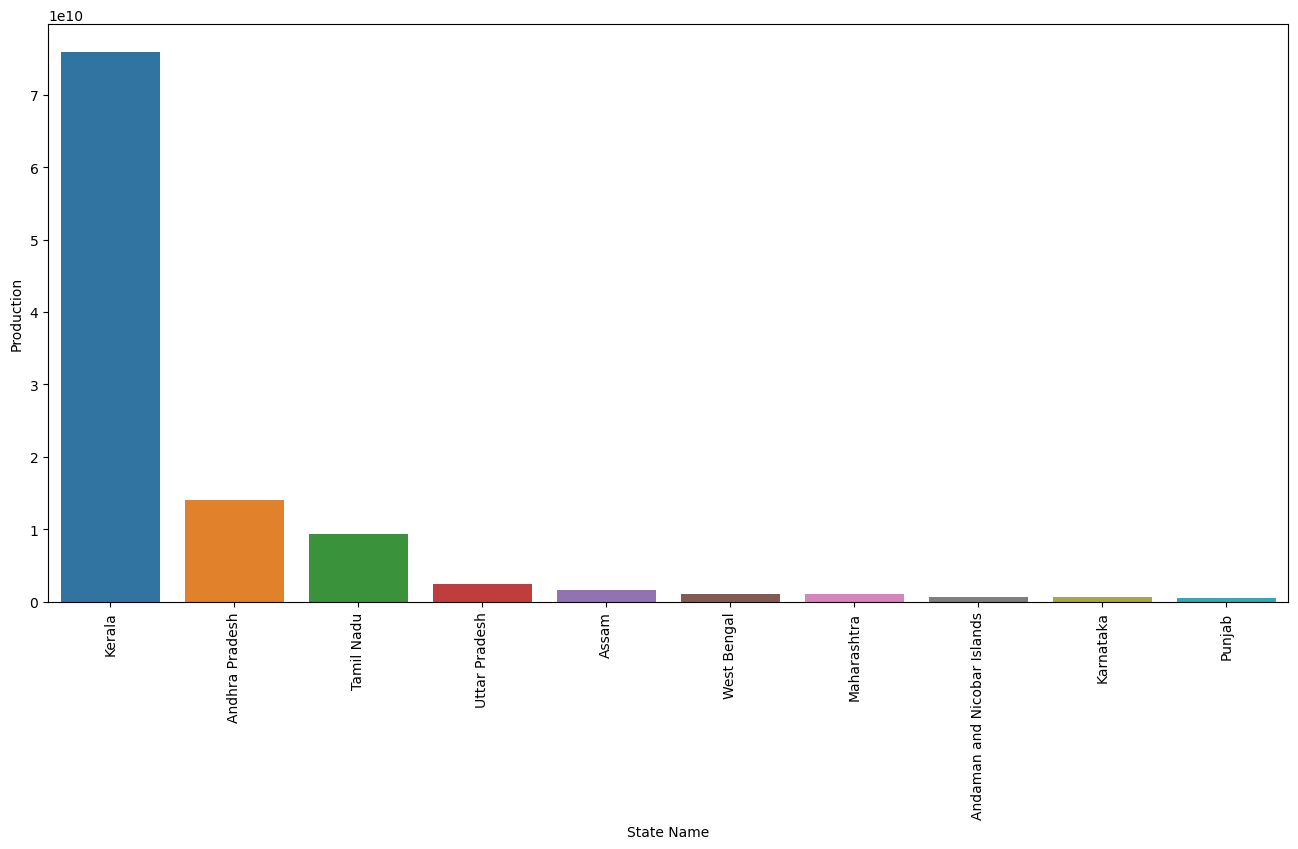

In [23]:
plt.figure(figsize=(16, 7.5))
sns.barplot(x ='State_Name',y ='Production',data=state_wise)
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Production')
plt.show()

### We can see that Kerela has the highest production, Also we can see that the top 3 states with the highest production over the years are from South India which is Kerala, Andhra Pradesh and Tamil Nadu.

In [24]:
train.Production.max()

1212000000.0

In [25]:
train[train.Production==1212000000.0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
138510,Tamil Nadu,COIMBATORE,2013,Whole Year,Coconut,84531.0,1.212000e+09


### Tamilnadu is the state with the highest production of any crop with 1212 million tonnes or 1.21 billion tonnes of Coconut in the year 2013

In [26]:
train.describe()

,Crop_Year,Area,Production
count,193911.000000,1.939110e+05,1.939110e+05
mean,2005.622765,1.221956e+04,5.691737e+05
std,4.953754,5.346682e+04,1.679175e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.050000e+02,7.324000e+02
75%,2010.000000,4.529500e+03,7.050000e+03
max,2015.000000,8.580100e+06,1.212000e+09


<Axes: xlabel='Production'>

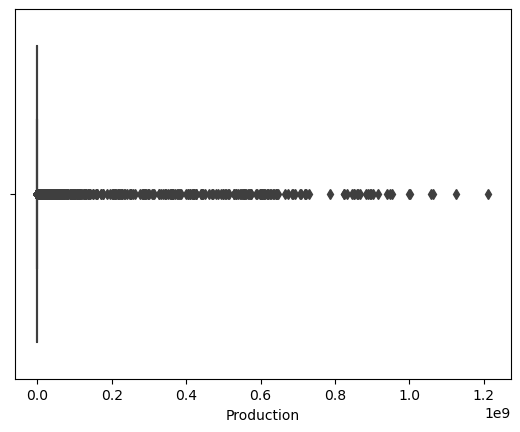

In [27]:
sns.boxplot(x=train.Production)

In [28]:
Top_10_Dist_name=train.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)
Top_10_Dist_name

,District_Name,Production
334,KOZHIKODE,1.270788e+10
372,MALAPPURAM,1.017336e+10
286,KANNUR,9.782848e+09
587,THIRUVANANTHAPURAM,7.596728e+09
590,THRISSUR,7.024658e+09
298,KASARAGOD,6.480635e+09
172,EAST GODAVARI,6.479130e+09
326,KOLLAM,4.682748e+09
437,PALAKKAD,4.461650e+09
178,ERNAKULAM,4.366461e+09


<Axes: xlabel='District_Name', ylabel='Production'>

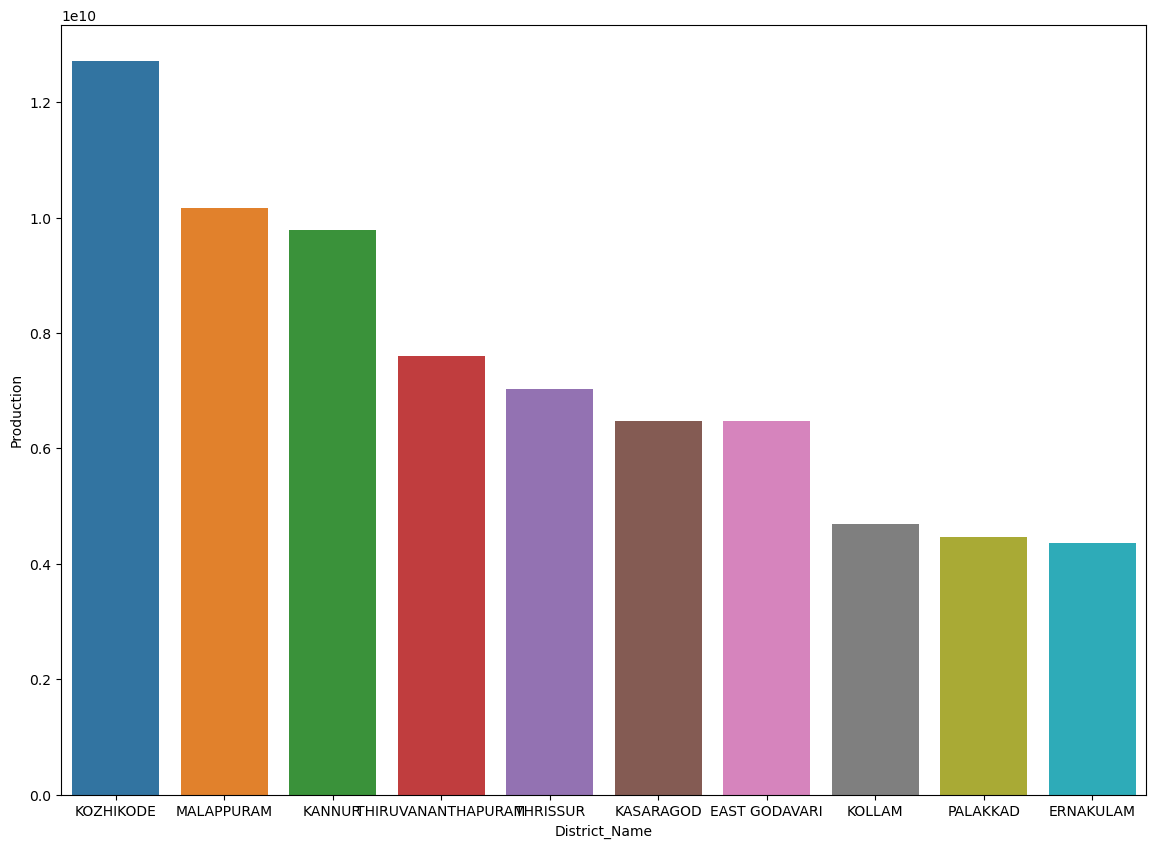

In [29]:
plt.figure(figsize=(14,10))
sns.barplot(x='District_Name', y ='Production',data=Top_10_Dist_name)

In [30]:
train.head(3)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0


In [31]:
train.groupby(['State_Name','Crop_Year'])['Production'].sum()

State_Name                   Crop_Year
Andaman and Nicobar Islands  2000         89056802.00
                             2001         89688482.00
                             2002         94336372.95
                             2003         95289831.93
                             2004         87183542.78
                                             ...     
West Bengal                  2010         30636857.00
                             2011         29346743.00
                             2012         29718358.00
                             2013         23904531.00
                             2014         28921018.00
Name: Production, Length: 519, dtype: float64

<Axes: xlabel='Crop_Year', ylabel='count'>

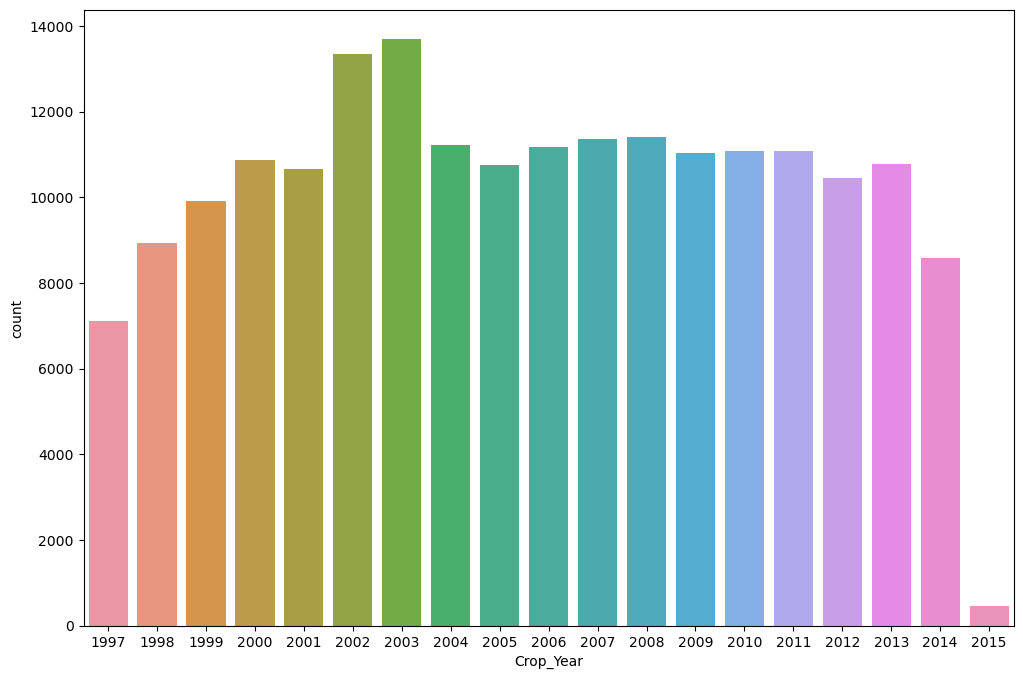

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='Crop_Year',data=train)

### 2002-2003 was the year when most of the crops were cultivated in India

In [33]:
train.Season.value_counts()

Season
Kharif         75607
Rabi           52885
Whole Year     44833
Summer         11868
Winter          4807
Autumn          3911
Name: count, dtype: int64

<Axes: xlabel='Season', ylabel='count'>

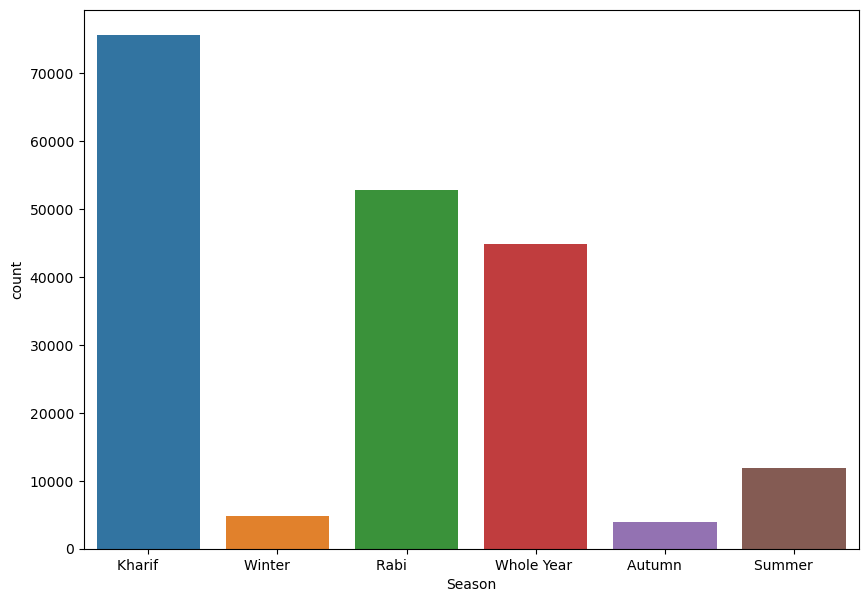

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x='Season',data=train)

<Axes: xlabel='Season', ylabel='Production'>

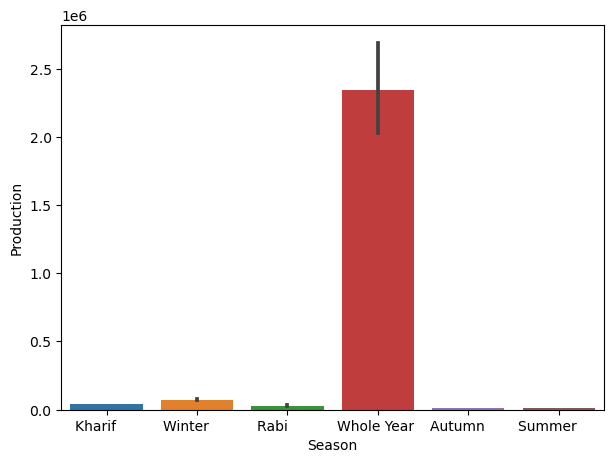

In [35]:
plt.figure(figsize=(7,5))
sns.barplot(data=train,x='Season',y='Production')

### Whole Year season seems to have more crop production as compared to other seasons in a year

In [36]:
train.groupby('Crop_Year')['Production'].sum()

Crop_Year
1997    6.600030e+08
1998    5.423444e+09
1999    4.329153e+09
2000    6.827786e+09
2001    5.694394e+09
2002    6.985247e+09
2003    7.282209e+09
2004    5.667680e+09
2005    5.884658e+09
2006    6.893278e+09
2007    6.534500e+09
2008    6.016735e+09
2009    6.529722e+09
2010    3.565708e+09
2011    1.113367e+10
2012    6.326423e+09
2013    9.234936e+09
2014    5.374366e+09
2015    5.132184e+06
Name: Production, dtype: float64

<Axes: xlabel='Crop_Year', ylabel='Production'>

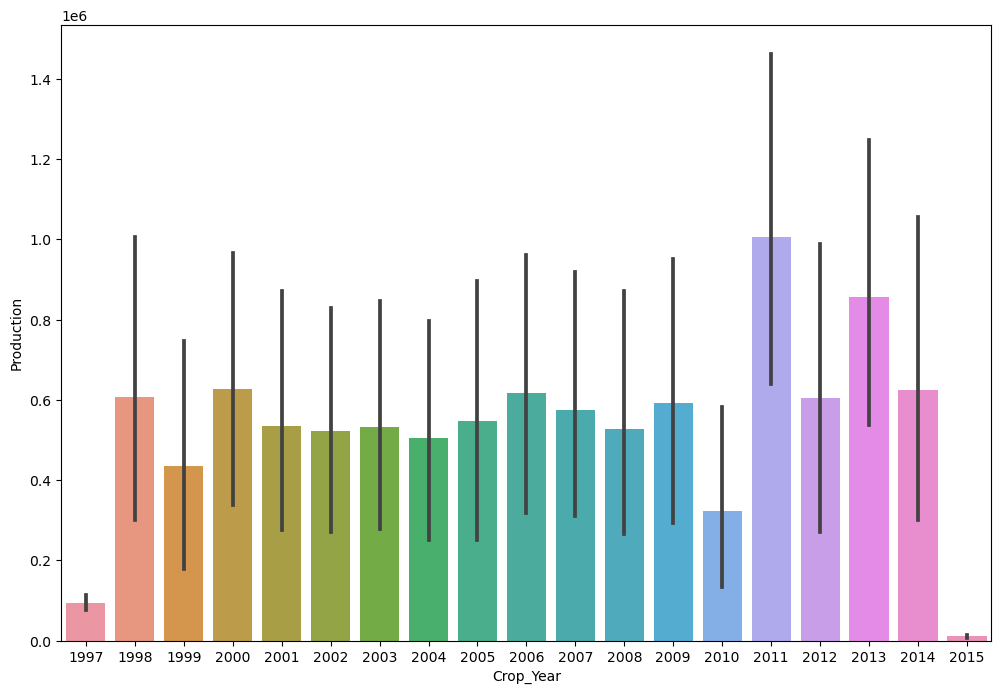

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crop_Year',y='Production',data=train)

### We conclude that the year 2002-2003 was the year most crops were cultivated, but the years 2011 and then 2013 happen to be the year which saw the highest Production of the crops.

In [38]:
train[train['Crop'] == 'Coconut']

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [39]:
Top_10_Crop_name=train.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)
Top_10_Crop_name

,Crop,Production
28,Coconut,1.014975e+11
106,Sugarcane,4.345243e+09
95,Rice,1.290792e+09
119,Wheat,1.068390e+09
87,Potato,3.341382e+08
33,Cotton(lint),2.323552e+08
59,Maize,2.176327e+08
49,Jute,1.424333e+08
7,Banana,1.190432e+08
105,Soyabean,1.142944e+08


<Axes: xlabel='Crop', ylabel='Production'>

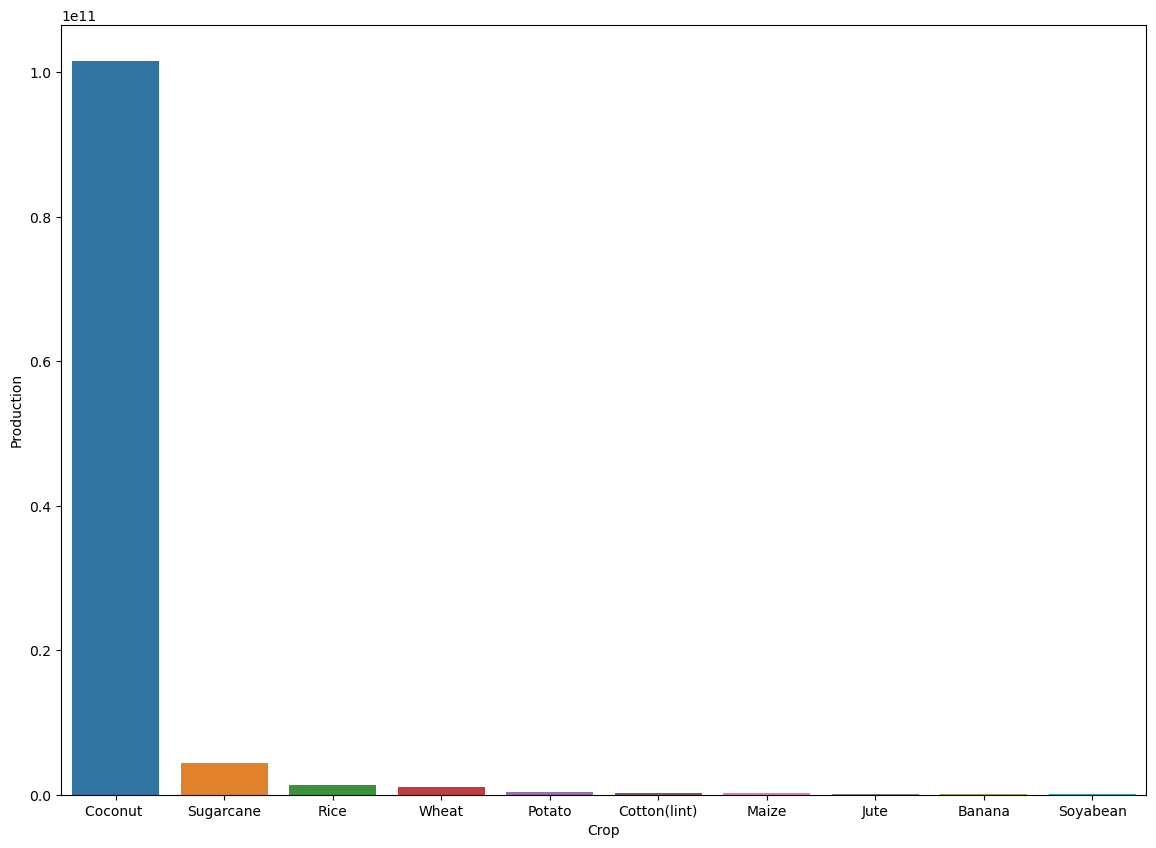

In [40]:
plt.figure(figsize=(14,10))
sns.barplot(x='Crop', y ='Production',data=Top_10_Crop_name)

### We can see that the production of Coconut is very high as compared to other crops production and Soyabean has the lowest production.

In [41]:
train.head(3)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0


In [42]:
train.groupby('Area')['Production'].max()

Area
0.10                0.08
0.20                0.50
0.24                2.00
0.29                3.00
0.50                0.20
                 ...    
4205800.00    3183800.00
4307200.00    3632200.00
5251200.00    3519600.00
5544000.00    4485800.00
8580100.00    7556300.00
Name: Production, Length: 33250, dtype: float64

In [43]:
Coconut =train[train.Crop=='Coconut ']
Coconut

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
338,Karnataka,BELGAUM,1998,Whole Year,Coconut,207.0,890.0
389,West Bengal,JALPAIGURI,1997,Whole Year,Coconut,1130.0,15255.0
401,Assam,KAMRUP,2012,Whole Year,Coconut,1435.0,7425.0
418,Assam,MARIGAON,2013,Whole Year,Coconut,750.0,5130.0
613,Karnataka,UDUPI,2006,Whole Year,Coconut,14976.0,63931.0
...,...,...,...,...,...,...,...
196407,Assam,DIBRUGARH,2008,Whole Year,Coconut,30.0,50000.0
196499,West Bengal,HOOGHLY,1999,Whole Year,Coconut,1150.0,23000.0
196676,Karnataka,KOLAR,2002,Whole Year,Coconut,2101.0,7523.0
196734,Karnataka,RAMANAGARA,2010,Whole Year,Coconut,14982.0,143220.0


<Axes: xlabel='Production', ylabel='State_Name'>

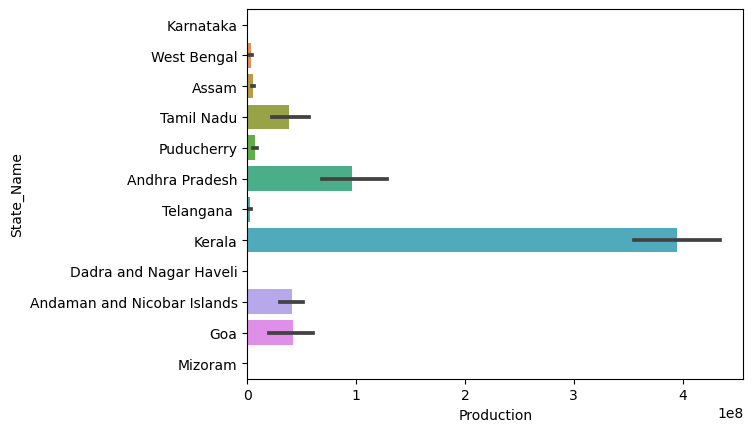

In [44]:
sns.barplot(y='State_Name',x='Production',data=Coconut)

### We can see that Coconut is not only produced in Kerala but also in some other States like Andhra Pradesh, Tamil Nadu and Goa also 
### But the production was highest in Kerala only.

<Axes: xlabel='Area', ylabel='Production'>

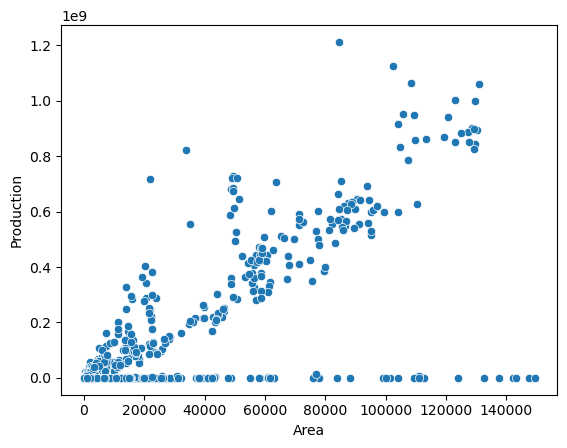

In [45]:
sns.scatterplot(data=Coconut,x='Area',y='Production')

### Coconut production has increased over the years which suggests that the favourable conditions for its growth has been increasing in India every year in different places.

<Axes: xlabel='Crop_Year', ylabel='Production'>

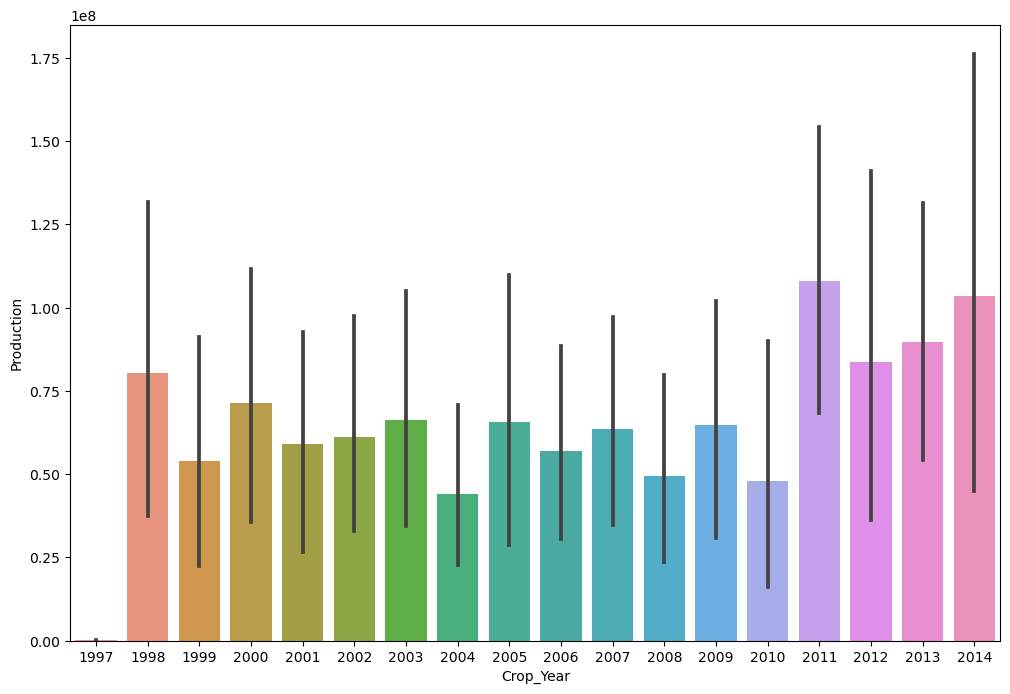

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crop_Year',y='Production',data=Coconut)

### The Production of Coconut has been increasing since 2011 in India.

In [47]:
Top_10_state_area_wise =train.groupby('State_Name')['Area'].sum().reset_index().sort_values(by='Area',ascending=False).head(10)
Top_10_state_area_wise

,State_Name,Area
30,Uttar Pradesh,3.447892e+08
16,Madhya Pradesh,2.634951e+08
17,Maharashtra,2.577138e+08
25,Rajasthan,2.168102e+08
32,West Bengal,1.856551e+08
14,Karnataka,1.619662e+08
9,Gujarat,1.212664e+08
1,Andhra Pradesh,1.049960e+08
4,Bihar,1.037301e+08
24,Punjab,1.022087e+08


<Axes: xlabel='State_Name', ylabel='Area'>

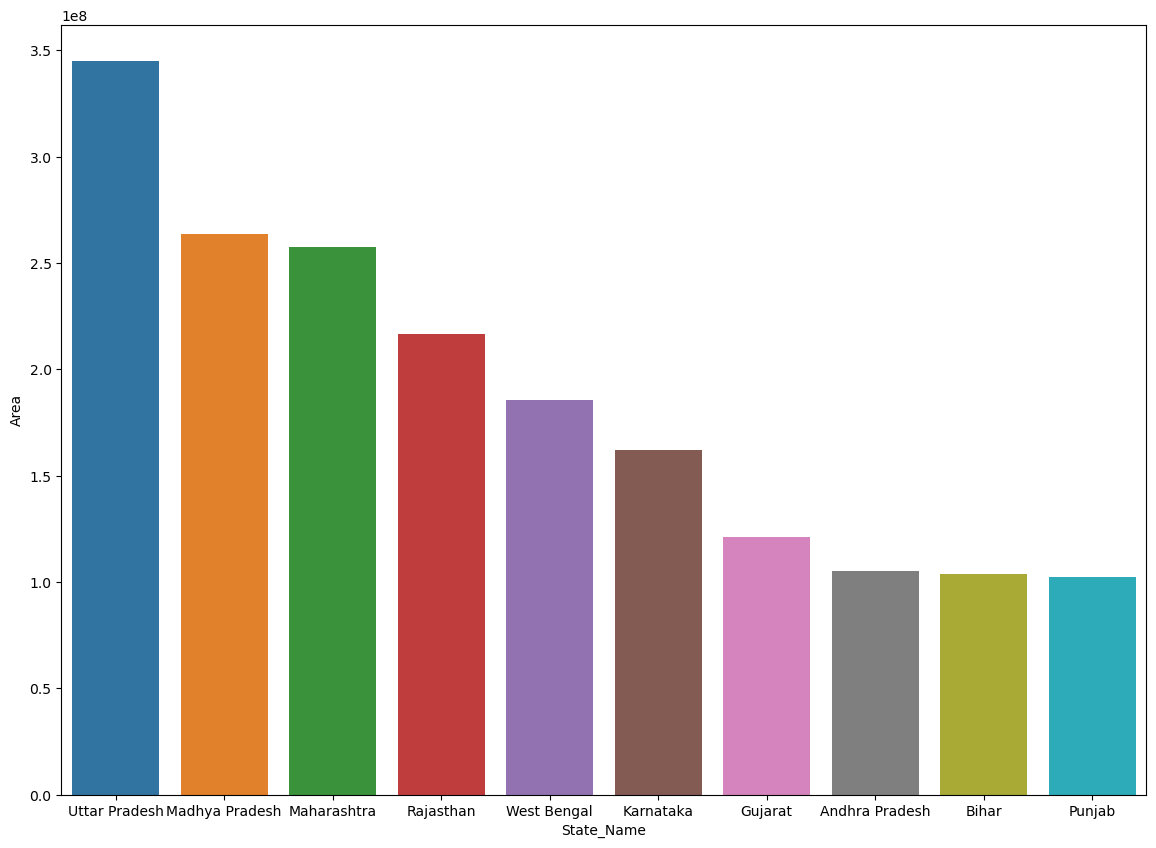

In [48]:
plt.figure(figsize=(14,10))
sns.barplot(x='State_Name', y ='Area',data=Top_10_state_area_wise)

### We can see that Uttar Pradesh have more Areas as compared to other states followed by Madhya Pradesh and Maharashtra and the least area Bihar and Punjab have.

In [49]:
Area =train.groupby(['Area','State_Name'])['Production'].sum().reset_index().sort_values(by='Production',ascending=False).head(10)
Area

,Area,State_Name,Production
70753,84531.00,Tamil Nadu,1.212000e+09
72273,102417.00,Kerala,1.125000e+09
72651,108380.00,Kerala,1.063000e+09
73853,131061.00,Kerala,1.059000e+09
73501,123066.00,Kerala,1.001000e+09
73778,129506.00,Kerala,9.990000e+08
72504,105789.00,Kerala,9.520000e+08
72706,109229.36,Kerala,9.467810e+08
73393,120704.00,Kerala,9.410000e+08
72392,104178.22,Kerala,9.160530e+08


<Axes: xlabel='State_Name', ylabel='Area'>

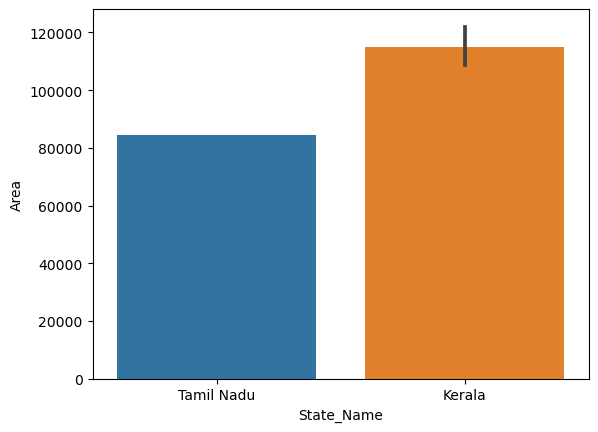

In [50]:
sns.barplot(x='State_Name', y='Area',data=Area)

### By seeing this graph we can conclude that even Tamil Nadu is not in the Top 10 Area-wise but still has more production as compared to Uttar Pradesh which has the highest Area.

In [51]:
Production =train.groupby('State_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head()
Production

,State_Name,Production
15,Kerala,7.592551e+10
1,Andhra Pradesh,1.400627e+10
27,Tamil Nadu,9.383089e+09
30,Uttar Pradesh,2.510232e+09
3,Assam,1.659829e+09


#### We can see Kerala have the highest number of crop production in India let analyse Kerala's data first

In [52]:
Kerala = train[train.State_Name=='Kerala']
Kerala

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
35,Kerala,WAYANAD,2003,Whole Year,Brinjal,8.0,0.0
82,Kerala,PALAKKAD,2009,Kharif,Jowar,2516.0,1283.0
131,Kerala,KOZHIKODE,2002,Whole Year,Sweet potato,9.0,103.0
149,Kerala,KOTTAYAM,2002,Whole Year,Jack Fruit,4501.0,21.0
225,Kerala,THIRUVANANTHAPURAM,2003,Whole Year,Sweet potato,34.0,385.0
...,...,...,...,...,...,...,...
196411,Kerala,PALAKKAD,2005,Whole Year,Black pepper,7457.0,1129.0
196595,Kerala,KASARAGOD,2004,Whole Year,Turmeric,74.0,148.0
196731,Kerala,KANNUR,2002,Whole Year,Pineapple,349.0,2002.0
196749,Kerala,WAYANAD,2005,Whole Year,Turmeric,251.0,621.0


In [53]:
Kerala_crop_production = Kerala.groupby('Crop')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Kerala_crop_production

,Crop,Production
10,Coconut,7.586324e+10
37,Tapioca,3.687717e+07
29,Rice,8.669611e+06
2,Banana,6.303891e+06
35,Sugarcane,3.357835e+06
0,Arecanut,1.714240e+06
21,Mango,1.307132e+06
30,Rubber,8.647800e+05
8,Cashewnut,7.170595e+05
5,Black pepper,7.063798e+05


## Coconut is most produced crop in Kerala

In [54]:
kerala_dist_production = Kerala.groupby('District_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
kerala_dist_production

,District_Name,Production
7,KOZHIKODE,1.270788e+10
8,MALAPPURAM,1.017336e+10
3,KANNUR,9.782848e+09
11,THIRUVANANTHAPURAM,7.596728e+09
12,THRISSUR,7.024658e+09
4,KASARAGOD,6.480635e+09
5,KOLLAM,4.682748e+09
9,PALAKKAD,4.461650e+09
1,ERNAKULAM,4.366461e+09
0,ALAPPUZHA,3.299292e+09


<Axes: xlabel='Production', ylabel='District_Name'>

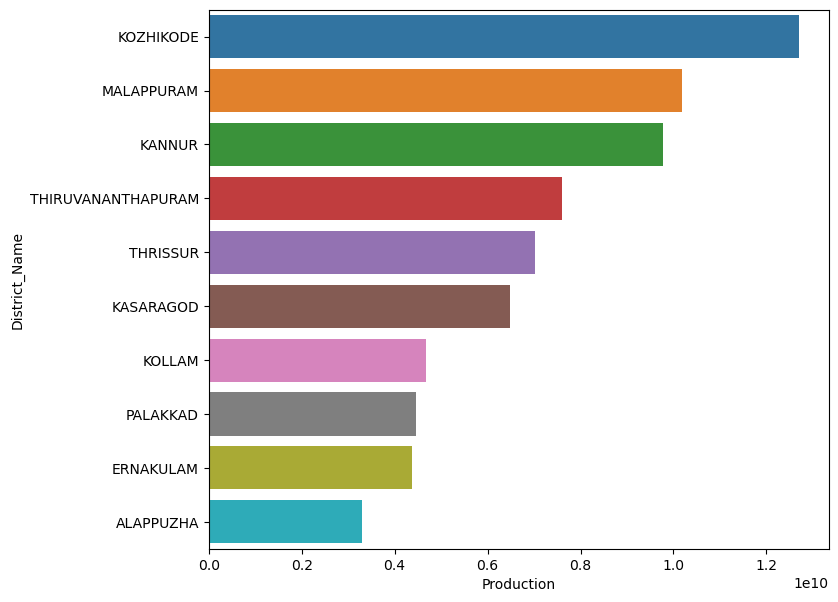

In [55]:
plt.figure(figsize=(8,7))
sns.barplot(y='District_Name',x='Production',data=kerala_dist_production)

### Kozhikode and Malappuram Districts in Kerala seem to have the most favourable conditions for any crop production since they have more production compared to any other district in Kerala

In [56]:
train.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Dry chillies,254.0,402.0
4,Gujarat,SURENDRANAGAR,1997,Kharif,Bajra,85900.0,103000.0


In [57]:
sugarcane =train[train.Crop=='Sugarcane']
sugarcane

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
49,Arunachal Pradesh,WEST SIANG,2010,Whole Year,Sugarcane,96.0,2785.0
55,Madhya Pradesh,HOSHANGABAD,2006,Whole Year,Sugarcane,1783.0,59250.0
71,Uttar Pradesh,AGRA,2004,Kharif,Sugarcane,230.0,11424.0
114,Andhra Pradesh,PRAKASAM,2013,Kharif,Sugarcane,673.0,53132.0
...,...,...,...,...,...,...,...
196767,Odisha,ANUGUL,1999,Winter,Sugarcane,1200.0,73960.0
196807,Uttar Pradesh,ALIGARH,2004,Kharif,Sugarcane,9156.0,466077.0
196819,Uttar Pradesh,DEORIA,2008,Kharif,Sugarcane,9405.0,417883.0
196820,Karnataka,KOPPAL,2010,Whole Year,Sugarcane,403.0,39051.0


In [58]:
Top_10_states= sugarcane.groupby('State_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Top_10_states

,State_Name,Production
28,Uttar Pradesh,1.685787e+09
16,Maharashtra,7.571184e+08
25,Tamil Nadu,6.717015e+08
13,Karnataka,3.986118e+08
8,Gujarat,1.956256e+08
1,Andhra Pradesh,1.832087e+08
4,Bihar,8.818586e+07
9,Haryana,8.193290e+07
29,Uttarakhand,6.867258e+07
23,Punjab,6.820700e+07


<Axes: xlabel='Production', ylabel='State_Name'>

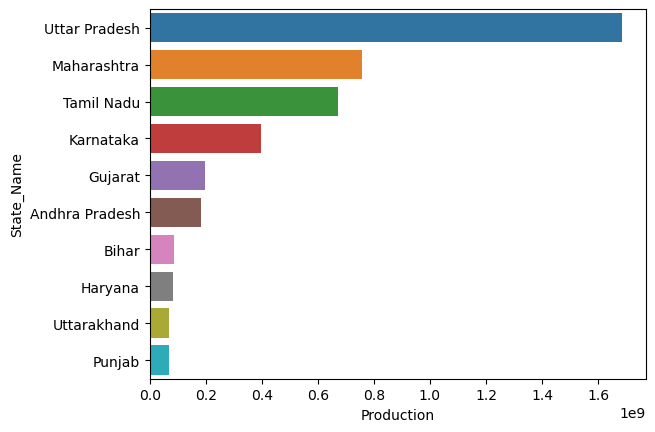

In [59]:
sns.barplot(x='Production',y='State_Name',data=Top_10_states)

### We can see that Uttar Pradesh have the highest sugarcane production in India and the second one is Maharashtra, Production least in Punjab.

<Axes: xlabel='Crop_Year', ylabel='Production'>

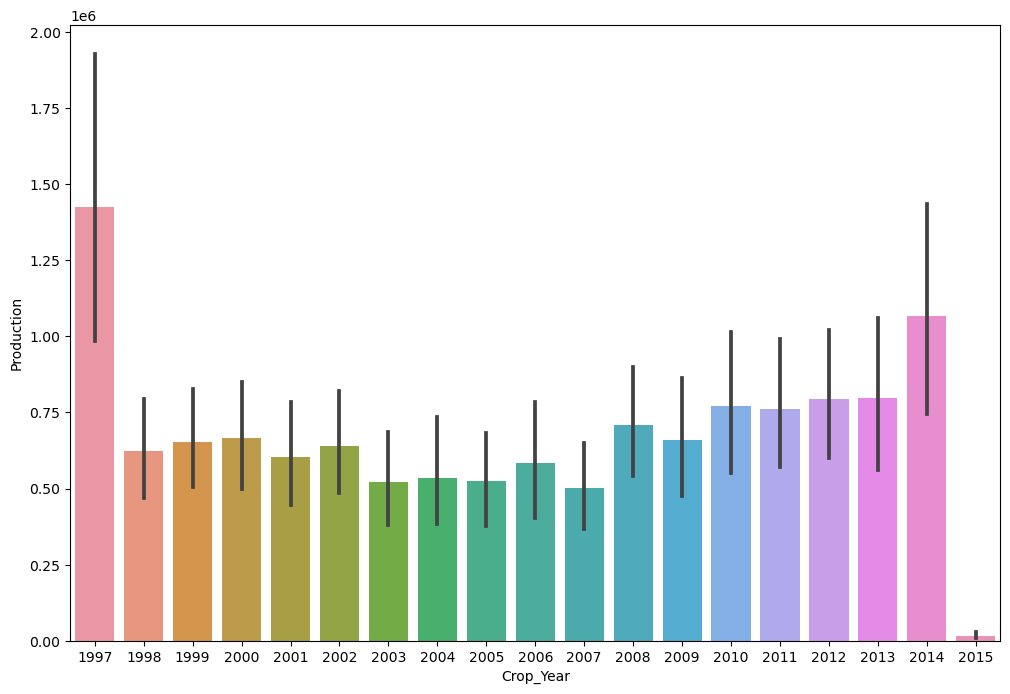

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crop_Year',y='Production',data=sugarcane)

#### We can state that the highest production of Sugarcane was in the years 1997 and 2014, The production was very less in year 2015.

In [61]:
Rice_production= train[train.Crop=='Rice']
Rice_production

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
44,West Bengal,BIRBHUM,2011,Winter,Rice,326412.0,940842.0
64,Arunachal Pradesh,LOWER SUBANSIRI,2006,Kharif,Rice,9643.0,12075.0
81,Bihar,MADHUBANI,2007,Winter,Rice,141004.0,60677.0
91,Assam,JORHAT,2009,Autumn,Rice,5443.0,6369.0
105,Assam,UDALGURI,2010,Winter,Rice,61418.0,89415.0
...,...,...,...,...,...,...,...
196761,Bihar,PASHCHIM CHAMPARAN,2007,Winter,Rice,96996.0,36374.0
196779,Uttar Pradesh,AURAIYA,2011,Kharif,Rice,50179.0,145519.0
196835,Assam,KARIMGANJ,2013,Winter,Rice,69394.0,138893.0
196836,Rajasthan,DAUSA,2001,Kharif,Rice,1.0,1.0


In [62]:
Top_10_states= Rice_production.groupby('State_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Top_10_states

,State_Name,Production
32,West Bengal,214426068.0
30,Uttar Pradesh,171414548.0
24,Punjab,148906000.0
1,Andhra Pradesh,111951109.0
22,Odisha,96333384.0
27,Tamil Nadu,80488557.0
4,Bihar,75502332.0
6,Chhattisgarh,63745983.0
3,Assam,56059375.0
28,Telangana,55097231.0


<Axes: xlabel='Production', ylabel='State_Name'>

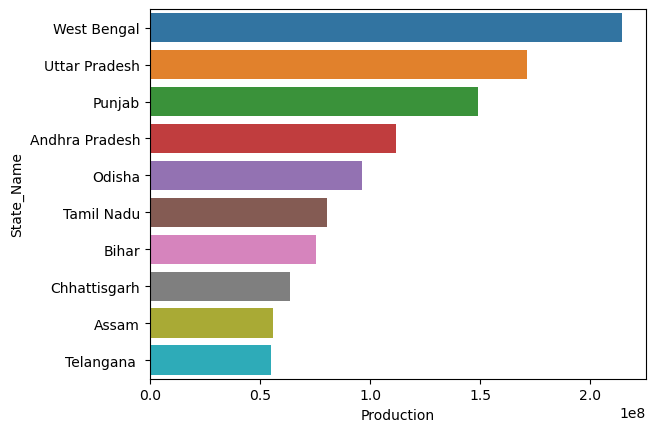

In [63]:
sns.barplot(y='State_Name',x='Production',data=Top_10_states)

### Here we find that West Bengal and Uttar Pradesh have the highest production of Rice in India and least in the Telangana.

<Axes: xlabel='Crop_Year', ylabel='Production'>

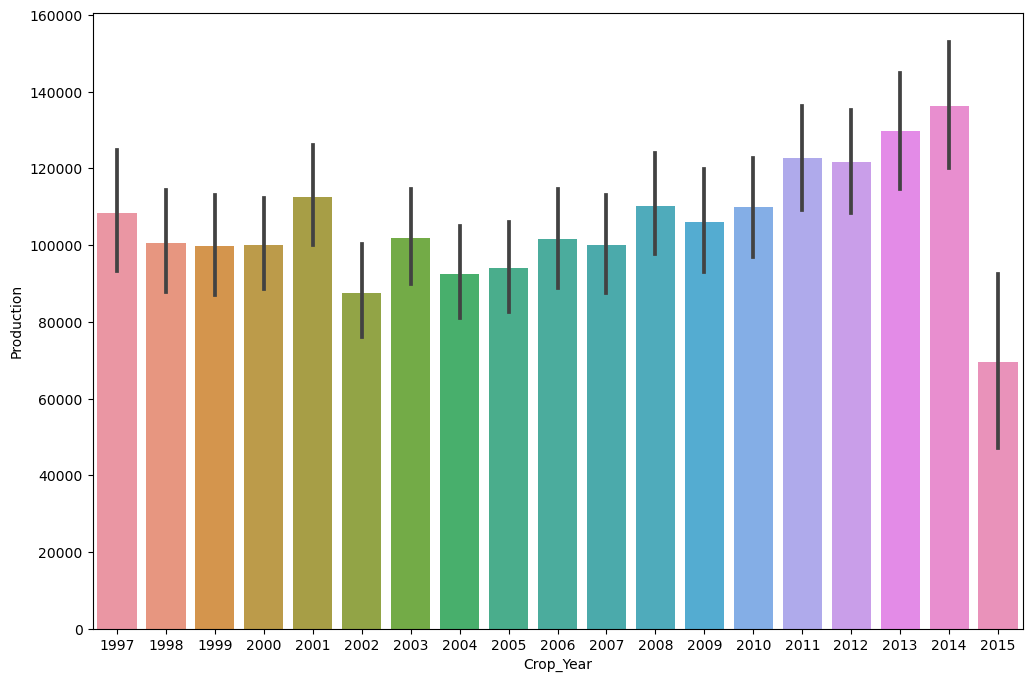

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crop_Year',y='Production',data=Rice_production)

#### We can see from 2004 to 2014 the production of rice was continuously rising but in 2015 the production of rice was very less.

# Now Take Test data

In [65]:
test.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00
21,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Black pepper,63.0,13.50
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.0,90.17
30,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Black pepper,75.5,15.86


In [66]:
test.reset_index(drop=True)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00
2,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Black pepper,63.0,13.50
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.0,90.17
4,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Black pepper,75.5,15.86
...,...,...,...,...,...,...,...
49213,West Bengal,PURULIA,2014,Kharif,Mesta,159.0,2065.00
49214,West Bengal,PURULIA,2014,Kharif,Moong(Green Gram),181.0,100.00
49215,West Bengal,PURULIA,2014,Kharif,Other Kharif pulses,79.0,39.00
49216,West Bengal,PURULIA,2014,Rabi,Khesari,146.0,126.00


In [67]:
test.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       768
dtype: int64

In [68]:
test.dropna(inplace=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48450 entries, 2 to 246088
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     48450 non-null  object 
 1   District_Name  48450 non-null  object 
 2   Crop_Year      48450 non-null  int64  
 3   Season         48450 non-null  object 
 4   Crop           48450 non-null  object 
 5   Area           48450 non-null  float64
 6   Production     48450 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.0+ MB


In [70]:
test.describe()

,Crop_Year,Area,Production
count,48450.000000,4.845000e+04,4.845000e+04
mean,2005.637812,1.195869e+04,6.358529e+05
std,4.976409,3.869045e+04,1.812132e+07
min,1997.000000,2.800000e-01,0.000000e+00
25%,2002.000000,8.500000e+01,8.700000e+01
50%,2006.000000,6.000000e+02,7.150000e+02
75%,2010.000000,4.588750e+03,6.996000e+03
max,2015.000000,1.403200e+06,1.250800e+09


In [71]:
test[test.duplicated()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [72]:
test['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2006, 2010, 2005, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [73]:
State_wise= test.groupby('State_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
State_wise

,State_Name,Production
15,Kerala,2.195454e+10
1,Andhra Pradesh,3.318316e+09
27,Tamil Nadu,2.693354e+09
30,Uttar Pradesh,7.242604e+08
3,Assam,4.519229e+08
32,West Bengal,3.207696e+08
17,Maharashtra,2.444218e+08
14,Karnataka,1.861974e+08
8,Goa,1.264140e+08
24,Punjab,1.163516e+08


<Axes: xlabel='Production', ylabel='State_Name'>

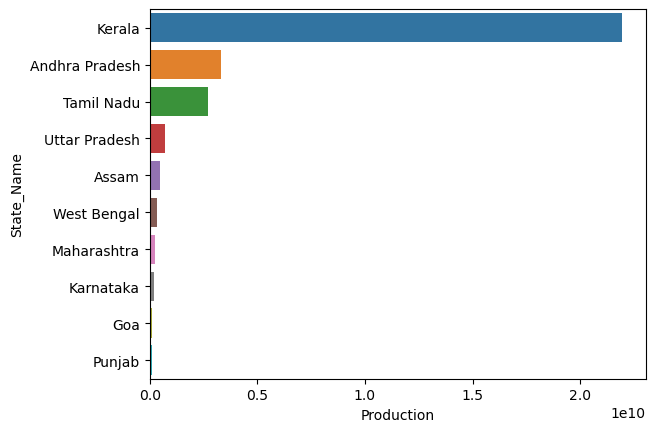

In [74]:
sns.barplot(x='Production',y='State_Name',data=State_wise)

In [75]:
District_wise = test.groupby('District_Name')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
District_wise

,District_Name,Production
370,MALAPPURAM,4.345039e+09
586,THRISSUR,2.898849e+09
333,KOZHIKODE,2.572865e+09
325,KOLLAM,2.469198e+09
583,THIRUVANANTHAPURAM,2.425987e+09
433,PALAKKAD,1.907731e+09
172,EAST GODAVARI,1.791928e+09
10,ALAPPUZHA,1.501170e+09
126,COIMBATORE,1.268962e+09
297,KASARAGOD,1.251582e+09


<Axes: xlabel='Production', ylabel='District_Name'>

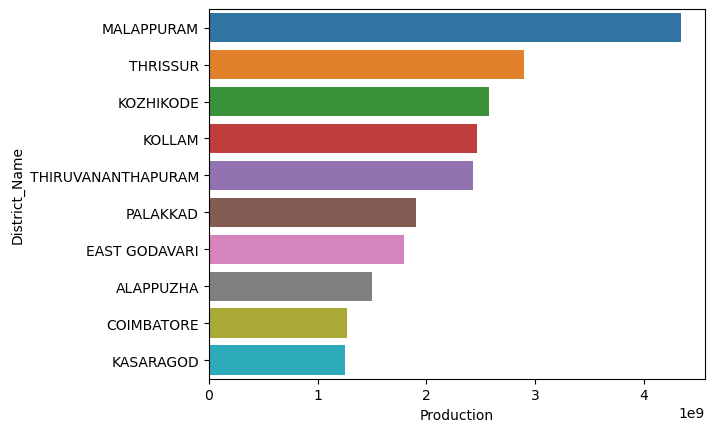

In [76]:
sns.barplot(x='Production',y='District_Name',data=District_wise)

In [77]:
test.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.00
21,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Black pepper,63.0,13.50
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.0,90.17
30,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Black pepper,75.5,15.86


In [78]:
Crop_year = test.groupby('Crop_Year')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Crop_year

,Crop_Year,Production
16,2013,3.668653e+09
17,2014,3.290174e+09
14,2011,3.175235e+09
13,2010,2.741901e+09
7,2004,2.521781e+09
8,2005,2.159099e+09
2,1999,2.105513e+09
15,2012,1.844632e+09
9,2006,1.788635e+09
4,2001,1.771147e+09


<Axes: xlabel='Crop_Year', ylabel='Production'>

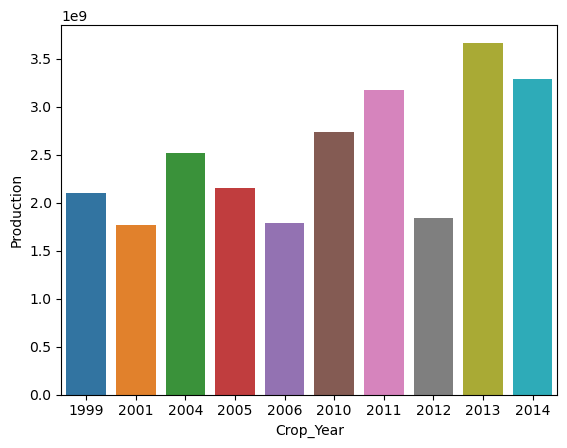

In [79]:
sns.barplot(y='Production',x='Crop_Year',data=Crop_year)

In [80]:
Season_wise = test.groupby('Season')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Season_wise

,Season,Production
4,Whole Year,2.935059e+10
1,Kharif,9.093550e+08
2,Rabi,4.217523e+08
5,Winter,8.287377e+07
3,Summer,2.881335e+07
0,Autumn,1.368599e+07


<Axes: xlabel='Season', ylabel='Production'>

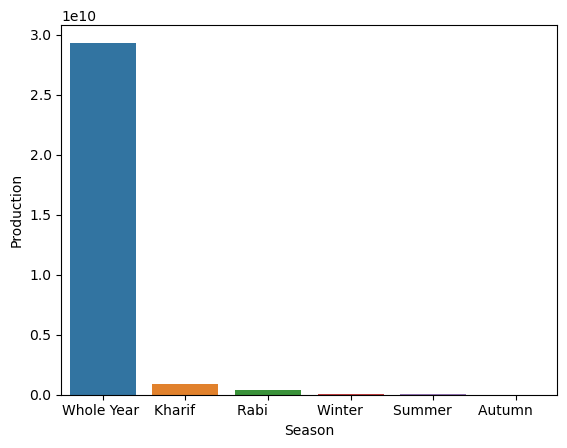

In [81]:
sns.barplot(y='Production',x='Season',data=Season_wise)

In [82]:
Crops =test.groupby('Crop')['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Crops

,Crop,Production
27,Coconut,2.848418e+10
100,Sugarcane,1.190439e+09
89,Rice,3.146786e+08
112,Wheat,2.644353e+08
81,Potato,9.068817e+07
31,Cotton(lint),6.464485e+07
56,Maize,5.570905e+07
47,Jute,3.912489e+07
99,Soyabean,2.754284e+07
6,Banana,2.708948e+07


<Axes: xlabel='Production', ylabel='Crop'>

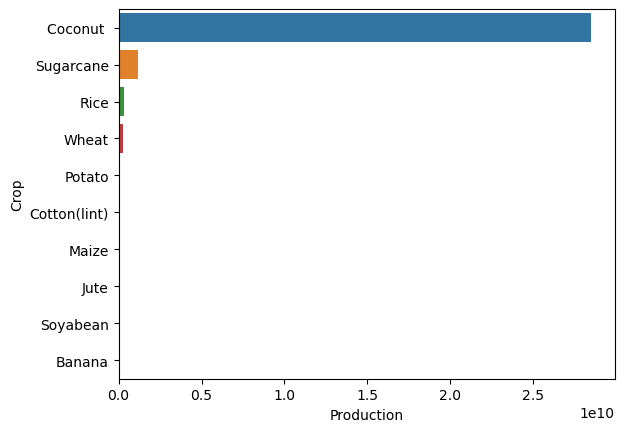

In [83]:
sns.barplot(x='Production',y='Crop',data=Crops)

In [84]:
Area_wise =test.groupby(['Area','State_Name'])['Production'].sum().reset_index().sort_values('Production',ascending=False).head(10)
Area_wise

,Area,State_Name,Production
25430,82704.00,Tamil Nadu,1.250800e+09
26215,123115.00,Kerala,9.480000e+08
25927,105481.00,Kerala,9.350000e+08
25888,103691.00,Kerala,9.330000e+08
26062,113162.00,Kerala,9.000000e+08
26046,112238.00,Kerala,8.590000e+08
26309,129865.00,Kerala,8.540000e+08
24038,46865.00,Andhra Pradesh,7.801620e+08
26199,121688.42,Kerala,7.696850e+08
25498,85366.00,Kerala,7.260000e+08


<Axes: xlabel='State_Name', ylabel='Area'>

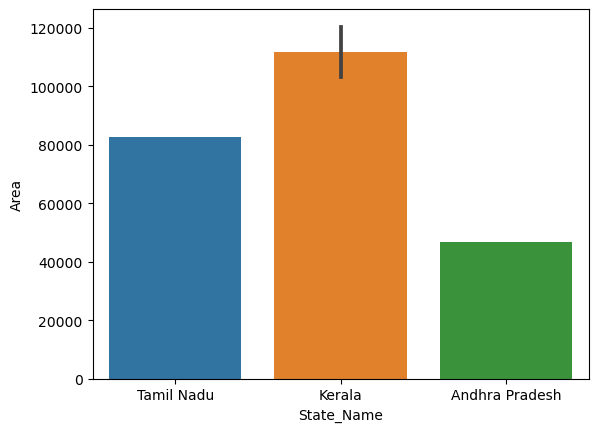

In [85]:

sns.barplot(x='State_Name',y='Area',data=Area_wise)

In [86]:
train.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Uttar Pradesh,MAU,2001,Kharif,Small millets,98.0,51.0
1,Odisha,BARGARH,2007,Winter,Sugarcane,742.0,47581.5
2,Bihar,PURBI CHAMPARAN,2010,Kharif,Mesta,7.0,120.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Dry chillies,254.0,402.0
4,Gujarat,SURENDRANAGAR,1997,Kharif,Bajra,85900.0,103000.0


In [87]:
train.describe(include='object')

,State_Name,District_Name,Season,Crop
count,193911,193911,193911,193911
unique,33,646,6,124
top,Uttar Pradesh,BIJAPUR,Kharif,Rice
freq,26553,735,75607,12061


#### We can see the District name has 646 unique values so we drop that column.

In [88]:
train.drop(columns='District_Name',inplace=True)

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
train['State_Name']=le.fit_transform(train['State_Name'])
train['Season']=le.fit_transform(train['Season'])
train['Crop']=le.fit_transform(train['Crop'])

In [91]:
train.head()

,State_Name,Crop_Year,Season,Crop,Area,Production
0,30,2001,1,103,98.0,51.0
1,22,2007,5,106,742.0,47581.5
2,4,2010,1,62,7.0,120.0
3,0,2010,2,37,254.0,402.0
4,9,1997,1,6,85900.0,103000.0


### Train Test split

In [92]:
X = train.drop(['Production'],axis=1)
y =train['Production']

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((155128, 5), (38783, 5), (155128,), (38783,))

## Scaling the data

In [94]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## Now will try to build with various models like Decision Tree and Randomforest etc

In [95]:
models=[DecisionTreeRegressor(),RandomForestRegressor()]

In [96]:
for i in range(2):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()
    print('--'*55)

DecisionTreeRegressor(): 
MSE_train:  1666247.5552526398
MSE_test:  82294178674456.27
RMSE_train:  1290.832117377252
RMSE_test:  9071613.895799153
R2_score_train:  0.999999993983815
R2_score_test:  0.7274697057801345

--------------------------------------------------------------------------------------------------------------
RandomForestRegressor(): 
MSE_train:  3439036580710.9146
MSE_test:  37262689556652.93
RMSE_train:  1854463.960477775
RMSE_test:  6104317.2883339645
R2_score_train:  0.9875829493503449
R2_score_test:  0.876598662118366

--------------------------------------------------------------------------------------------------------------


### Randomized Search CV

In [97]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = list(range(300,500,200))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [98]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,
                            cv=3,random_state=0)
rf_model.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [300]},
                   random_state=0)

In [100]:
# best parameter
rf_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [101]:
final_model = RandomForestRegressor(n_estimators = 300,min_samples_split = 2,min_samples_leaf = 1,max_features = 'sqrt',max_depth = 30)
final_model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300)

In [102]:
#predicting the values
trian_pred=final_model.predict(X_train_scaled)
test_pred=final_model.predict(X_test_scaled)

print('R2 score of training dataset',r2_score(y_train,trian_pred))
print('R2 score of testing dataset',r2_score(y_test,test_pred))

R2 score of training dataset 0.9899673739359778
R2 score of testing dataset 0.9016714218595691


In [104]:
from sklearn.metrics import mean_absolute_error
print('r2 score train', r2_score(y_train,trian_pred))
print('r2_score test:',r2_score(y_test,test_pred))
print('MAE:', mean_absolute_error(y_test, test_pred))
print('MSE:', mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))

r2 score train 0.9899673739359778
r2_score test: 0.9016714218595691
MAE: 172452.2065317168
MSE: 29691633370364.656
RMSE: 5449002.970302425
